<a href="https://colab.research.google.com/github/c0pper/fakenews_detector/blob/main/File%20Vincenzo/Fake_News%202016%204%20ouput.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
import pandas as pd
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from keras.models import Sequential
from keras.layers import Dense
from keras.initializers import RandomUniform


In [47]:

FNDF = pd.read_csv("https://raw.githubusercontent.com/c0pper/fakenews_detector/main/File%20Vincenzo/FN20K.csv",names=["1","2","3","4","5","6","7","8","9","10","11","12","13","14","15","16","17","18","19","20","21","22","23","24","25","26","27","28","29","30","31","32","33","34","35","36","37","38","39","40","41","42","43","44","45","46","47","48","49","50","51","52","53","54","55","56","57","58","59","60","61","62","63","64","65","66","67","68","69","70","71","72","73","74","75","76","77","78","79","80","81","82","83","84","85","86","87","88","89","90","91","92","93","94","95","96","97","98","99","100","101","102","103","104","105","106","107","108","109","110","111","112","113","114","115","116","117","118","119","120","121","122","123","124","125","126","127","128","129","130","131","132","133","134","135","136","137","138","139","140","141","142","143","144","145","146","147","148","149","150","151","152","153","154","155","156","157","158","159","160","161","162","163","164","165","166","167","168","169","170","171","172","173","174","175","176","177","178","179","180","181","182","183","184","185","186","187","188","189","190","191","192","193","194","195","196","197","198","199","200","201","202","203","204","205"],sep=";")

In [48]:
#import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
 #   for filename in filenames:
  #      print(os.path.join(dirname, filename))

In [49]:
VTDF = pd.read_csv("https://github.com/c0pper/fakenews_detector/raw/main/File%20Vincenzo/ValidationTest%20(1).csv",names=["1","2","3","4","5","6","7","8","9","10","11","12","13","14","15","16","17","18","19","20","21","22","23","24","25","26","27","28","29","30","31","32","33","34","35","36","37","38","39","40","41","42","43","44","45","46","47","48","49","50","51","52","53","54","55","56","57","58","59","60","61","62","63","64","65","66","67","68","69","70","71","72","73","74","75","76","77","78","79","80","81","82","83","84","85","86","87","88","89","90","91","92","93","94","95","96","97","98","99","100","101","102","103","104","105","106","107","108","109","110","111","112","113","114","115","116","117","118","119","120","121","122","123","124","125","126","127","128","129","130","131","132","133","134","135","136","137","138","139","140","141","142","143","144","145","146","147","148","149","150","151","152","153","154","155","156","157","158","159","160","161","162","163","164","165","166","167","168","169","170","171","172","173","174","175","176","177","178","179","180","181","182","183","184","185","186","187","188","189","190","191","192","193","194","195","196","197","198","199","200","201","202","203","204","205"],sep=",")

VTDF.describe()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.0,20.000000,20.00000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.0,20.00000,20.0,20.000000,20.000000,20.000000,20.0,...,20.0,20.000000,20.000000,20.000000,20.000000,20.0,20.0,20.0,20.000000,20.000000,20.000000,20.000000,20.000000,20.0,20.000000,20.000000,20.000000,20.0,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.00000,20.000000,20.000000,20.0,20.000000,20.0,20.0,20.0,20.000000,20.0,20.0,20.0,20.000000,20.000000
mean,0.237320,1.652500,0.839000,1.414815,5.439500,9.942970,1.283000,4.086928,1.328000,2.504494,2.447000,4.689673,3.663000,6.123199,1.043967,7.339000,25.880500,0.0,1.200000,1.10000,10.250000,1.650000,13.650000,0.150000,4.000000,0.550000,6.800000,13.703600,4.879500,45.723500,3.171000,9.881136,67.659000,0.0,0.25000,0.0,1.000000,4.300000,32.950000,0.0,...,0.0,0.200000,2.820530,19.132000,2.847000,0.0,0.0,0.0,0.050000,0.100000,2.050000,0.550000,6.600000,0.0,0.050000,1.300000,11.750000,0.0,2.250000,2.099989,14.417000,0.731660,0.552445,57.528000,3.900000,29.900000,0.85350,0.932830,24.331000,0.0,0.100000,0.0,0.0,0.0,0.050000,0.0,0.0,0.0,0.100000,0.500000
std,0.148351,1.082268,2.596729,2.023391,13.861398,6.016669,3.677833,3.676288,4.471791,2.567767,6.310523,3.656685,10.141019,5.873443,0.476746,3.563416,7.698366,0.0,0.695852,0.91191,5.290259,0.587143,1.954078,0.366348,1.521772,0.510418,2.462348,4.327889,0.384988,14.707396,1.034179,1.624794,6.855381,0.0,0.71635,0.0,1.076055,0.470162,4.605203,0.0,...,0.0,0.410391,0.980587,5.370703,0.666753,0.0,0.0,0.0,0.223607,0.307794,2.855742,0.510418,2.521487,0.0,0.223607,0.571241,3.431664,0.0,1.069924,0.450525,2.869466,0.322756,0.354648,29.383185,1.410487,7.819678,2.09878,0.100206,7.193461,0.0,0.307794,0.0,0.0,0.0,0.223607,0.0,0.0,0.0,0.307794,0.512989
min,0.051561,0.380000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.281667,0.313977,1.880000,14.760000,0.0,0.000000,0.00000,1.000000,1.000000,10.000000,0.000000,2.000000,0.000000,2.000000,6.859000,4.190000,25.110000,1.230000,8.124282,59.390000,0.0,0.00000,0.0,0.000000,4.000000,25.000000,0.0,...,0.0,0.000000,1.761200,12.980000,1.780000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,2.000000,0.0,0.000000,1.000000,7.000000,0.0,1.000000,0.891495,6.750000,0.284800,0.159400,19.870000,2.000000,16.000000,0.00000,0.735714,13.540000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000
25%,0.146840,1.065000,0.000000,0.000000,0.000000,5.637215,0.000000,1.374018,0.000000,0.000000,0.000000,2.001428,0.000000,2.363750,0.794774,5.252500,19.722500,0.0,1.000000,0.75000,6.750000,1.000000,13.000000,0.000000,3.000000,0.000000,4.750000,11.034500,4.680000,35.727500,2.440000,8.683834,63.062500,0.0,0.00000,0.0,0.000000,4.000000,29.750000,0.0,...,0.0,0.000000,2.053134,14.627500,2.460000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,5.000000,0.0,0.000000,1.000000,9.750000,0.0,2.000000,1.904006,13.627500,0.503575,0.266150,34.542500,3.000000,23.750000,0.00000,0.861000,18.677500,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000
50%,0.224254,1.420000,0.000000,0.823000,0.000000,9.323250,0.000000,3.455666,0.000000,1.592250,0.000000,4.281750,0.000000,4.378095,1.042593,7.565000,24.775000,0.0,1.000000,1.00000,10.000000,2.000000,14.000000,0.000000,4.000000,1.000000,7.000000,12.953501,4.965000,41.250000,2.935000,9.346173,65.870000,0.0,0.00000,0.0,1.000000,4.000000,33.000000,0.0,...,0.0,0.000000,2.536919,17.770000,2.815000,0.0,0.0,0.

In [50]:
FNDF.head(1000)


,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205
0,0.076686,0.47,0.000,1.754000,0.000,5.264000,0.000,1.404000,0.00,1.404000,0.000,4.210000,0.000,5.964000,0.556383,3.41,34.60,0,0,2,12,1,10,0,5,1,7,15.238,3.96,76.76,4.40,10.574541,64.81,0,0,0,0,4,30,0,...,0,0,5.410458,33.16,2.38,0,0,0,0,1,9,1,7,0,0,3,19,0,1,2.757441,16.90,0.6153,0.4566,48.05,5,36,0.00,0.888000,32.10,0,0,0,0,0,0,0,0,0,0,0
1,0.232759,1.53,0.000,0.000000,0.000,7.142500,0.000,2.677500,0.00,5.357500,0.000,3.572500,0.000,6.250000,1.011663,6.65,52.21,0,1,1,10,1,12,0,4,1,10,28.071,4.90,40.20,5.86,9.492901,62.40,0,0,0,1,5,33,0,...,0,1,3.000000,19.72,2.79,0,0,0,0,0,1,0,5,0,0,1,9,0,2,1.244422,8.18,0.5220,0.4820,44.50,3,25,0.00,1.000000,50.00,0,0,0,0,0,0,0,0,0,0,0
2,0.273462,1.91,0.000,0.000000,0.000,9.090000,0.000,9.090000,0.00,6.060000,0.000,9.090000,0.000,0.000000,1.164003,8.13,29.07,0,0,1,13,2,16,0,3,1,9,16.014,5.09,36.38,3.21,8.014867,55.98,0,0,0,0,4,30,0,...,0,0,2.230647,15.58,2.22,0,0,0,0,0,6,0,2,0,0,1,11,0,1,3.493440,24.40,0.8196,0.6489,65.90,4,28,0.00,0.973333,26.93,0,0,0,0,0,0,0,0,0,0,1
3,0.000000,0.00,3.845,0.640833,23.075,3.845833,1.925,0.320833,7.69,1.281667,9.615,1.602500,3.845,0.640833,0.368880,2.19,37.14,0,0,1,9,2,13,2,12,1,6,17.371,4.15,69.45,5.86,12.417270,73.72,0,0,0,0,3,20,0,...,0,0,4.534358,26.92,2.31,0,0,0,0,0,5,2,14,0,0,3,19,0,2,1.844399,10.95,0.6500,0.6047,55.61,6,35,5.37,0.895000,34.57,0,0,0,0,0,0,0,0,0,1,1
4,0.345626,2.40,0.000,2.381667,0.000,3.571667,0.000,3.571667,0.00,0.000000,0.000,3.571667,0.000,3.571667,0.691252,4.80,39.57,0,0,0,6,1,10,0,6,1,10,21.129,4.77,46.13,4.86,10.138358,70.40,0,0,0,0,3,24,0,...,0,0,1.683486,11.69,3.17,0,0,0,0,0,1,0,3,0,0,1,10,0,2,2.419381,16.80,0.5376,0.3698,40.56,3,23,0.00,0.886667,37.57,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.328579,2.08,6.250,0.892857,26.040,3.720000,17.710,2.530000,5.21,0.744286,20.830,2.975714,23.960,3.422857,1.431214,9.06,23.78,0,2,1,12,2,16,1,7,1,6,11.819,4.47,60.74,4.02,10.982118,69.52,0,0,0,0,3,21,0,...,0,0,3.208383,20.31,2.49,0,0,0,0,0,1,2,14,0,0,2,17,0,4,2.707617,17.14,1.1449,0.4293,71.63,6,40,6.69,0.955714,22.42,0,0,0,0,0,0,0,0,0,0,1
996,0.321400,2.18,0.000,0.512000,0.000,12.820000,0.000,2.564000,0.00,1.026000,0.000,1.026000,0.000,2.052000,0.992210,6.73,89.82,0,1,0,3,1,11,0,5,1,13,47.318,4.72,45.09,10.09,8.670416,58.81,0,0,0,0,4,33,0,...,0,1,2.381010,16.15,2.70,0,0,0,0,0,1,3,24,0,0,4,27,0,2,2.305821,15.64,0.3121,0.3342,28.76,6,40,0.00,0.836000,84.82,0,0,0,0,0,0,0,0,0,1,1
997,0.240695,1.79,0.000,0.000000,0.000,20.000000,0.000,6.665000,0.00,6.665000,0.000,6.665000,0.000,10.000000,0.617202,4.59,56.42,0,2,0,5,1,10,0,2,1,7,32.250,5.26,26.69,7.42,8.541329,63.52,0,0,0,0,5,43,0,...,0,0,2.872210,21.36,3.54,0,0,0,0,0,2,0,4,0,0,1,8,0,3,1.680835,12.50,0.5102,0.4114,40.30,3,22,0.00,1.165000,53.67,0,0,0,0,0,0,0,0,0,0,0
998,0.394785,2.60,0.000,0.000000,0.000,14.285000,0.000,21.430000,0.00,7.145000,0.000,7.145000,0.000,0.000000,0.475261,3.13,47.75,0,1,1,12,1,11,0,2,1,8,24.350,4.87,41.75,5.13,7.749939,51.04,0,0,0,2,5,37,0,...,0,1,3.304050,21.76,2.52,0,0,0,0,1,6,0,3,0,0,1,11,0,1,3.638098,23.96,0.4991,0.4499,41.79,4,27,0.00,0.995000,44.00,0,0,0,0,0,0,0,0,0,0,0


In [51]:
FNDF.describe()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205
count,19352.000000,19352.000000,19352.000000,19352.000000,19352.000000,19352.000000,19352.000000,19352.000000,19352.000000,19352.000000,19352.000000,19352.000000,19352.000000,19352.000000,19352.000000,19352.000000,19352.000000,19352.000000,19352.000000,19352.000000,19352.000000,19352.000000,19352.000000,19352.000000,19352.000000,19352.000000,19352.000000,19352.000000,19352.000000,19352.000000,19352.000000,19352.000000,19352.000000,19352.000000,19352.000000,19352.000000,19352.000000,19352.000000,19352.000000,19352.000000,...,19352.000000,19352.000000,19352.000000,19352.000000,19352.000000,19352.000000,19352.000000,19352.000000,19352.000000,19352.000000,19352.000000,19352.000000,19352.000000,19352.000000,19352.000000,19352.000000,19352.000000,19352.000000,19352.000000,19352.000000,19352.000000,19352.000000,19352.000000,19352.000000,19352.000000,19352.000000,19352.000000,19352.000000,19352.000000,19352.000000,19352.000000,19352.0,19352.0,19352.000000,19352.000000,19352.000000,19352.000000,19352.000000,19352.000000,19352.000000
mean,0.227815,1.544573,1.326454,1.483890,7.525167,9.088713,2.956507,3.652027,1.938141,2.402797,3.200176,3.351514,3.328048,4.129117,0.854111,5.795153,41.373147,0.001757,0.633733,0.900010,8.628772,1.139262,10.791339,0.221166,4.751654,0.919853,8.825651,21.361428,4.749616,48.591826,4.769311,8.726866,58.505477,0.000827,0.077511,0.005839,0.532555,4.695639,34.526871,0.000620,...,0.000465,0.392466,3.124390,20.749994,2.920822,0.000155,0.016432,0.000878,0.080819,0.242869,4.159777,0.497726,6.316556,0.002945,0.052811,1.560097,13.438869,0.005271,1.437784,2.495867,16.733285,0.635840,0.590523,53.413822,3.930601,29.060304,1.358653,0.897846,38.443890,0.001447,0.216722,0.0,0.0,0.000775,0.024855,0.001033,0.030126,0.001809,0.163084,0.492972
std,0.186296,1.288271,4.458810,3.852397,16.317571,8.715473,7.365180,5.122749,5.980333,4.497048,8.053549,4.299020,8.247792,6.087063,0.415144,2.998267,24.671484,0.050801,0.811839,0.850864,5.001241,0.617878,3.748112,0.464958,2.490169,0.420933,2.736756,12.531653,0.535162,13.225503,2.247132,1.747818,9.841711,0.032138,0.420751,0.138340,1.168539,1.166145,7.280483,0.035212,...,0.023838,0.624555,1.086869,5.576474,0.853610,0.012450,0.201382,0.029627,0.434043,0.535279,3.727987,1.612056,8.958199,0.125098,0.718652,1.648136,9.232345,0.078571,1.109551,1.390250,8.808957,0.997388,1.063865,72.558074,2.094257,11.641157,2.702808,0.212710,22.988498,0.041892,0.639309,0.0,0.0,0.034467,0.345134,0.047673,0.386817,0.055188,0.604759,0.499964
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.105220,0.700000,0.000000,0.000000,0.000000,5.116857,0.000000,1.418036,0.000000,0.308750,0.000000,1.296250,0.000000,1.587431,0.626252,4.170000,28.830000,0.000000,0.000000,0.000000,5.000000,1.000000,9.000000,0.000000,3.000000,1.000000,7.000000,14.720000,4.530000,40.630000,3.330000,8.020863,55.120000,0.000000,0.000000,0.000000,0.000000,4.000000,31.000000,0.000000,...,0.000000,0.000000,2.523674,17.550000,2.480000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,3.000000,0.000000,0.000000,1

In [52]:
Y=FNDF['205'].values 
YVal=VTDF['205'].values 

In [53]:
X = FNDF.drop(['205'],axis=1).values
XVal = VTDF.drop(['205'],axis=1).values

In [54]:
len(XVal)

20

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.15, random_state=1)

In [56]:
X_train

array([[0.05394111, 0.33      , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.22803763, 1.68      , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.6615208 , 4.35      , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.22635984, 1.56      , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.2563252 , 1.83      , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.1523616 , 1.09      , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [57]:
XVal


array([[0.158715, 1.16    , 0.      , ..., 0.      , 0.      , 0.      ],
       [0.317668, 2.27    , 0.      , ..., 0.      , 0.      , 0.      ],
       [0.265749, 1.85    , 0.      , ..., 0.      , 0.      , 1.      ],
       ...,
       [0.239696, 1.39    , 0.      , ..., 0.      , 0.      , 1.      ],
       [0.093525, 0.56    , 9.23    , ..., 0.      , 0.      , 0.      ],
       [0.230078, 1.55    , 0.      , ..., 0.      , 0.      , 0.      ]])

In [58]:
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)
YVal= le.transform(YVal)
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)
XVal = ss.transform(XVal)



y_train.shape


(16449,)

In [59]:
XVal.mean()


-0.023579097219902853

In [60]:
XVal.std()

0.6860458548889729

In [61]:
X_test.std()

1.042380183186217

In [62]:
from keras.layers import LeakyReLU
from keras import optimizers

In [64]:
#sgd = optimizers.SGD(momentum=0.9, nesterov=True, decay=1e-6, lr=0.01
#adamax=optimizers.Adamax()

In [65]:
from keras.regularizers import l1_l2
from keras.regularizers import l2
from keras.layers import Dropout

In [66]:
model = Sequential()
#model.add(Dense(100, input_dim=X_train.shape[1]))
model.add(Dense(100, input_dim=X_train.shape[1], kernel_regularizer=l1_l2(l1=0.007, l2=0.005)))
model.add(LeakyReLU(alpha=0.001))
#model.add(Dropout(0.3)) 
model.add(Dense(60,  activation="relu",kernel_regularizer=l1_l2(l1=0.001, l2=0.001))) 
model.add(LeakyReLU(alpha=0.001))
model.add(Dense(60,  activation="tanh",kernel_regularizer=l1_l2(l1=0.001, l2=0.001))) 
model.add(LeakyReLU(alpha=0.001))
model.add(Dropout(0.3)) 
model.add(Dense(30,  activation="relu",kernel_regularizer=l1_l2(l1=0.001, l2=0.001))) 
model.add(LeakyReLU(alpha=0.001)) 
#model.add(Dropout(0.3)) 
model.add(Dense(15,  activation="relu",kernel_regularizer=l1_l2(l1=0.001, l2=0.001))) 
model.add(LeakyReLU(alpha=0.001)) 
#model.add(Dropout(0.3)) 
model.add(Dense(7,  activation="relu",kernel_regularizer=l1_l2(l1=0.001, l2=0.001))) 
model.add(LeakyReLU(alpha=0.001)) 
#model.add(Dense(3, activation="softmax"))
#model.compile(optimizer='adamax', loss='categorical_crossentropy', metrics=['accuracy'])
model.add(Dense(1, activation="sigmoid"))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

#model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['accuracy'])

In [67]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               20500     
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 60)                6060      
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 60)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 60)                3660      
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 60)                0         
_________________________________________________________________
dropout (Dropout)            (None, 60)                0

In [68]:
from keras.callbacks import History
history= History()
from time import time
start_at = time ()
model.fit(X_train, y_train, epochs=100, batch_size=512, callbacks=[history])
exec_time = time()-start_at

Epoch 1/100
33/33 [==============================] - 2s 8ms/step - loss: 10.5930 - accuracy: 0.5571
Epoch 2/100
33/33 [==============================] - 0s 8ms/step - loss: 6.3103 - accuracy: 0.7594
Epoch 3/100
33/33 [==============================] - 0s 7ms/step - loss: 3.3215 - accuracy: 0.8380
Epoch 4/100
33/33 [==============================] - 0s 8ms/step - loss: 1.5963 - accuracy: 0.8556
Epoch 5/100
33/33 [==============================] - 0s 8ms/step - loss: 0.9473 - accuracy: 0.8587
Epoch 6/100
33/33 [==============================] - 0s 8ms/step - loss: 0.7609 - accuracy: 0.8631
Epoch 7/100
33/33 [==============================] - 0s 8ms/step - loss: 0.6513 - accuracy: 0.8720
Epoch 8/100
33/33 [==============================] - 0s 8ms/step - loss: 0.6004 - accuracy: 0.8751
Epoch 9/100
33/33 [==============================] - 0s 8ms/step - loss: 0.5619 - accuracy: 0.8757
Epoch 10/100
33/33 [==============================] - 0s 7ms/step - loss: 0.5276 - accuracy: 0.8816
Epoch 11

Tempo di addestramento: 0 minuti e 27 secondi
91/91 [==============================] - 0s 1ms/step - loss: 0.3792 - accuracy: 0.8980


[0.3791729807853699, 0.898036539554596]

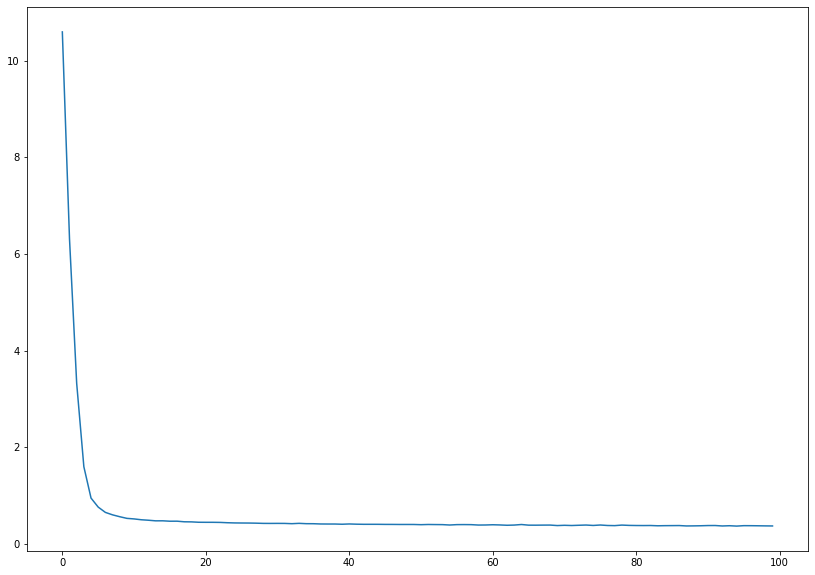

In [69]:
print("Tempo di addestramento: %d minuti e %d secondi" % (exec_time/60, exec_time%60))
plt.figure(figsize=(14,10))
plt.plot(history.history['loss'])
model.evaluate (X_test,y_test)

In [77]:
from sklearn.metrics import confusion_matrix
import numpy as np

In [82]:
y_pred_test = model.predict(X_test) 
y_pred_test = np.round(y_pred_test).astype(int)
print(y_pred_test)
cm = confusion_matrix(y_test, y_pred_test)
cm

# y_pred_test = model.predict_classes(X_test)
# cm= confusion_matrix(y_test, y_pred_test)


[[0]
 [0]
 [0]
 ...
 [1]
 [1]
 [0]]


array([[1299,  166],
       [ 130, 1308]])

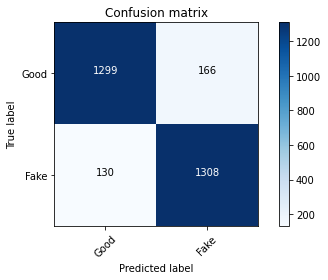

In [83]:
import matplotlib.pyplot as plt
import itertools

def showBounds(X,Y,model, labels=["classe negativa", "classe positiva"]):
    
    h = .02 

    x_min, x_max = X[:, 0].min(), X[:, 0].max()
    y_min, y_max = X[:, 1].min(), X[:, 1].max()

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = model.predict_classes(np.c_[xx.ravel(), yy.ravel()])

    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)

    X_m = X[Y==1]
    X_b = X[Y==0]
    plt.scatter(X_b[:, 0], X_b[:, 1], c="green",  edgecolor='white', label=labels[0])
    plt.scatter(X_m[:, 0], X_m[:, 1], c="red",  edgecolor='white', label=labels[1])


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()





plot_confusion_matrix(cm,['Good','Fake'])




In [84]:
model.evaluate (X_test,y_test)

91/91 [==============================] - 0s 1ms/step - loss: 0.3792 - accuracy: 0.8980


[0.3791729807853699, 0.898036539554596]

In [90]:
y_pred_Val = model.predict(XVal)
for i in range(0,len(XVal)):
   # if(y_test[i]!=y_pred[i]):
        print("%d)Etichettato come %d classificato come %d" %  (i+1,YVal[i], y_pred_Val[i]))

1)Etichettato come 1 classificato come 0
2)Etichettato come 1 classificato come 0
3)Etichettato come 1 classificato come 0
4)Etichettato come 1 classificato come 0
5)Etichettato come 1 classificato come 0
6)Etichettato come 1 classificato come 0
7)Etichettato come 1 classificato come 0
8)Etichettato come 1 classificato come 0
9)Etichettato come 1 classificato come 0
10)Etichettato come 1 classificato come 0
11)Etichettato come 0 classificato come 0
12)Etichettato come 0 classificato come 0
13)Etichettato come 0 classificato come 0
14)Etichettato come 0 classificato come 0
15)Etichettato come 0 classificato come 0
16)Etichettato come 0 classificato come 0
17)Etichettato come 0 classificato come 0
18)Etichettato come 0 classificato come 0
19)Etichettato come 0 classificato come 0
20)Etichettato come 0 classificato come 0


In [91]:
model.evaluate (XVal,YVal)

1/1 [==============================] - 0s 19ms/step - loss: 1.8655 - accuracy: 0.5000


[1.8654731512069702, 0.5]